# Graduate Students: Problem 3: Project Update

Write out three clear (specific) questions that you are trying to answer in your project. 

For each question, provide 1-2 graphs that illustrate the answer to that question, as well as a couple sentences of explanation to accompany each graph (explain what you did to generate the graph, and what the graph shows). 

Do you think your answers are clear, or is further work needed? If you feel additional tests/analyses are needed, describe what you plan to do. If there are areas where you feel you need additional guidance, please describe the issues here.

In [1]:
import numpy as np
import scipy.stats as st
import statistics as stats
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

%matplotlib inline

In [2]:
df_Q1=pd.read_csv("Lyell_blw_Maclure_timeseries_stage_Q_T_2005_2015.csv",low_memory=False)
df_Q01=df_Q1[df_Q1[' estimated_discharge(cms)'].isna()==False]
df_Q01['date_time(inGMT_PDTplus7)']=pd.to_datetime(df_Q01['date_time(inGMT_PDTplus7)'])

C:\Users\LIGHTMAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\LIGHTMAN\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Q01 site water temperature time series plot')

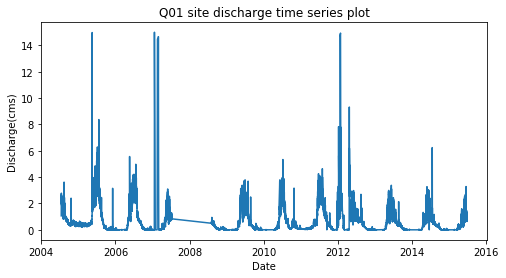

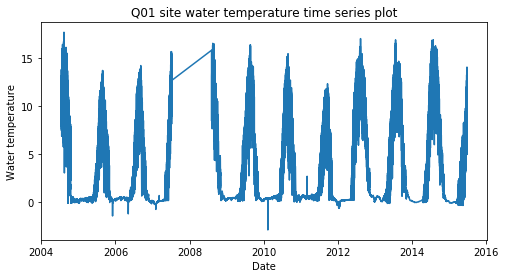

In [3]:
plt.figure(figsize=(8,4))
plt.plot(df_Q01['date_time(inGMT_PDTplus7)'],df_Q01[' estimated_discharge(cms)'])
plt.xlabel('Date')
plt.ylabel('Discharge(cms)')
plt.title('Q01 site discharge time series plot')

plt.figure(figsize=(8,4))
plt.plot(df_Q01['date_time(inGMT_PDTplus7)'],df_Q01[' water_temperature(deg_C)'])
plt.xlabel('Date')
plt.ylabel('Water temperature')
plt.title('Q01 site water temperature time series plot')

In [4]:
df_Q01.columns

Index(['date_time(inGMT_PDTplus7)', ' raw_pressure(cm)',
       ' barocorrected_pressure(cm)',
       ' stage_in_feet(used_in_rating_curve_ft_referenced_to_bolt)',
       ' estimated_discharge(cms)',
       'lower_confidence_discharge_cms_bestestimate',
       'upper_confidence_discharge_cms_bestestimate',
       ' water_temperature(deg_C)', ' instrument_ID',
       ' offset_cm(cm_to_correct_solinst_to_bolt)',
       ' offset_ft(ft_to_correct_solinst_to_bolt)'],
      dtype='object')

In [5]:
df_c=df_Q01[df_Q01['date_time(inGMT_PDTplus7)']>='2009-01-01 00:00:00']
#Clean the abnormal points from original data
df_c=df_c[df_c[' estimated_discharge(cms)']<=8]

Text(0.5, 1.0, 'Q01 site water temperature time series plot-cleaned')

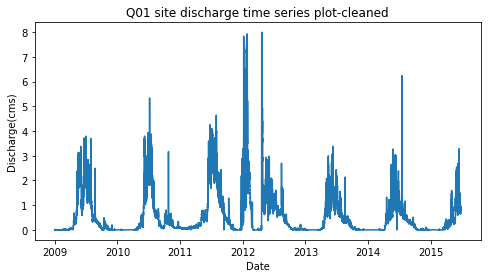

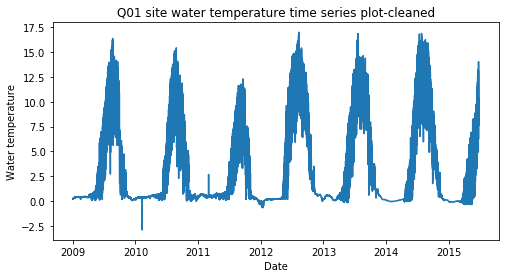

In [6]:
#Note that we only use the data from 2009 to 2015
plt.figure(figsize=(8,4))
plt.plot(df_c['date_time(inGMT_PDTplus7)'],df_c[' estimated_discharge(cms)'])
plt.xlabel('Date')
plt.ylabel('Discharge(cms)')
plt.title('Q01 site discharge time series plot-cleaned')

plt.figure(figsize=(8,4))
plt.plot(df_c['date_time(inGMT_PDTplus7)'],df_c[' water_temperature(deg_C)'])
plt.xlabel('Date')
plt.ylabel('Water temperature')
plt.title('Q01 site water temperature time series plot-cleaned')

In [7]:
df_c=df_c.set_index('date_time(inGMT_PDTplus7)')

In [8]:
discharge=df_c[ ' estimated_discharge(cms)'].resample('W').mean()
tmean=df_c[' water_temperature(deg_C)'].resample('W').mean()

In [9]:
df_week=pd.DataFrame(discharge)
df_week['tmean']=tmean
df_week.columns=['discharge', 'tmean']
df_week[df_week['discharge']<0]=0
df_week.head()

,discharge,tmean
date_time(inGMT_PDTplus7),,
2009-01-04,0.001777,0.259740
2009-01-11,0.000694,0.333839
2009-01-18,0.000077,0.381458
2009-01-25,0.000809,0.406696
2009-02-01,0.000770,0.411607


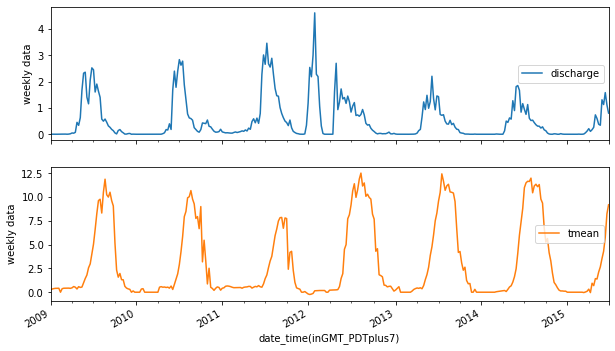

In [10]:
import seaborn as sns
cols_plot = ['discharge', 'tmean']
axes = df_week[cols_plot].plot( linestyle='-', figsize=(10, 6), subplots=True)
for ax in axes:
    ax.set_ylabel('weekly data')
    ax.legend(loc='right')

In [11]:
df_week['datetime']=df_week.index
cols = df_week.columns.tolist()
cols1 = cols[-1:] + cols[:-1]
df_week1=df_week[cols1]
df_week1=df_week1.reset_index(drop = True)
df_week1.head()

,datetime,discharge,tmean
0,2009-01-04,0.001777,0.259740
1,2009-01-11,0.000694,0.333839
2,2009-01-18,0.000077,0.381458
3,2009-01-25,0.000809,0.406696
4,2009-02-01,0.000770,0.411607


Text(0, 0.5, 'water temperature (°C)')

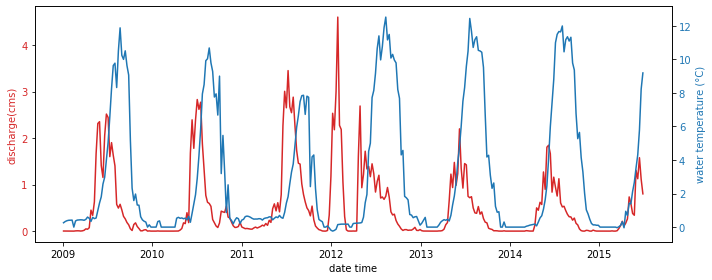

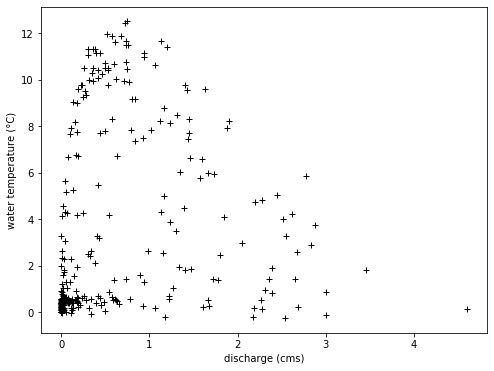

In [12]:
fig, ax1 = plt.subplots(figsize=(10,4))
color = 'tab:red'
ax1.set_xlabel('date time')
ax1.set_ylabel('discharge(cms)', color=color)
ax1.plot(df_week['datetime'], df_week['discharge'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('water temperature (°C)', color=color)  
ax2.plot(df_week['datetime'], df_week['tmean'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  

plt.figure(figsize=(8,6))
plt.plot(df_week['discharge'],df_week['tmean'],'k+')
plt.xlabel('discharge (cms)')
plt.ylabel('water temperature (°C)')

Although it is impossible to creat a linear regression model for discharge and water temperature, there is indeed a correlation between water temperature and discharge with a certain relaxation time from each other.

# Determind the onset date of snowmelt runoff and water temperature rising from 2009-2015.

## For 2009 data

In [13]:
df_2009=df_week1[0:52]
df_2009.head()

,datetime,discharge,tmean
0,2009-01-04,0.001777,0.259740
1,2009-01-11,0.000694,0.333839
2,2009-01-18,0.000077,0.381458
3,2009-01-25,0.000809,0.406696
4,2009-02-01,0.000770,0.411607


Text(0, 0.5, 'Temperature(°C)')

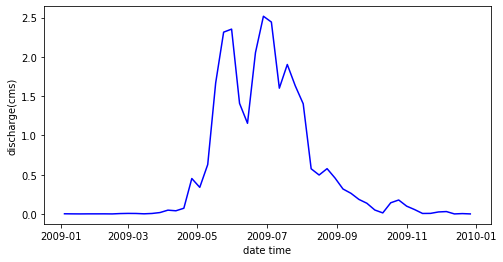

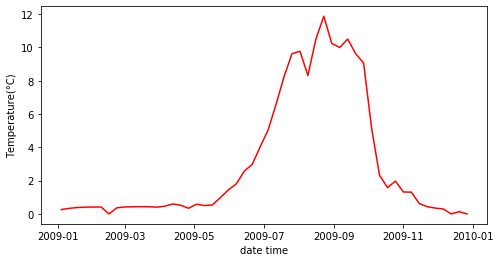

In [14]:
plt.figure(figsize=(8,4))
plt.plot(df_2009['datetime'], df_2009['discharge'],color='blue')
plt.xlabel('date time')
plt.ylabel('discharge(cms)')

plt.figure(figsize=(8,4))
plt.plot(df_2009['datetime'], df_2009['tmean'], color='red')
plt.xlabel('date time')
plt.ylabel('Temperature(°C)')

19.969722818554036
26.653379499256435


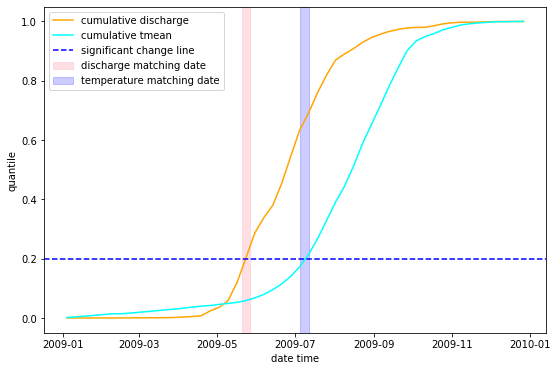

In [15]:
from scipy.interpolate import interp1d

dsum2009=np.sum(df_2009['discharge'])
dcsum2009=np.cumsum(df_2009['discharge'])
dcp2009=dcsum2009/dsum2009

tsum2009=np.sum(df_2009['tmean'])
tcsum2009=np.cumsum(df_2009['tmean'])
tcp2009=tcsum2009/tsum2009

fd2009=interp1d(dcp2009, df_2009.index)
print(fd2009(0.2))
ft2009=interp1d(tcp2009, df_2009.index)
print(ft2009(0.2))

plt.figure(figsize=(9,6))
plt.plot(df_2009['datetime'], dcp2009, label='cumulative discharge', color='orange')
plt.plot(df_2009['datetime'], tcp2009, label='cumulative tmean', color='cyan')
plt.axhline(0.2, color='blue', linestyle='--', label='significant change line')
plt.axvspan('2009-05-21','2009-05-27', alpha=0.5, color='pink', label='discharge matching date')
plt.axvspan('2009-07-05','2009-07-12', alpha=0.2, color='blue', label='temperature matching date')
plt.xlabel('date time')
plt.ylabel('quantile')
plt.legend(loc="best")

discharge 5/24/2009, temperature 7/8/2009

## For 2010 data

In [16]:
df_2010=df_week1[52:104]
df_2010.head()

,datetime,discharge,tmean
52,2010-01-03,0.000000,0.000000
53,2010-01-10,0.000000,0.000000
54,2010-01-17,0.000000,0.000000
55,2010-01-24,0.003260,0.332262
56,2010-01-31,0.000308,0.369970


Text(0, 0.5, 'Temperature(°C)')

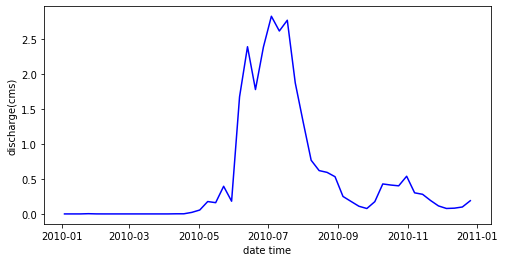

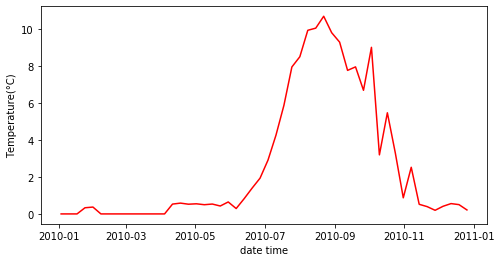

In [17]:
plt.figure(figsize=(8,4))
plt.plot(df_2010['datetime'], df_2010['discharge'], color='blue')
plt.xlabel('date time')
plt.ylabel('discharge(cms)')

plt.figure(figsize=(8,4))
plt.plot(df_2010['datetime'], df_2010['tmean'], color='red')
plt.xlabel('date time')
plt.ylabel('Temperature(°C)')

75.19440704789547
80.65066015513646


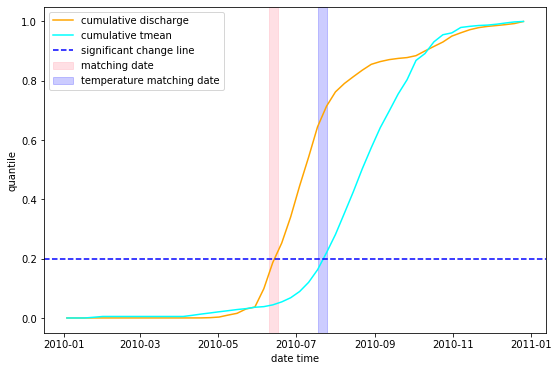

In [18]:
dsum2010=np.sum(df_2010['discharge'])
dcsum2010=np.cumsum(df_2010['discharge'])
dcp2010=dcsum2010/dsum2010

tsum2010=np.sum(df_2010['tmean'])
tcsum2010=np.cumsum(df_2010['tmean'])
tcp2010=tcsum2010/tsum2010

f2010=interp1d(dcp2010, df_2010.index)
print(f2010(0.2))
ft2010=interp1d(tcp2010, df_2010.index)
print(ft2010(0.2))

plt.figure(figsize=(9,6))
plt.plot(df_2010['datetime'], dcp2010, label='cumulative discharge', color='orange')
plt.plot(df_2010['datetime'], tcp2010, label='cumulative tmean', color='cyan')
plt.axhline(0.2, color='blue', linestyle='--', label='significant change line')
plt.axvspan('2010-06-10','2010-06-17', alpha=0.5, color='pink', label='matching date')
plt.axvspan('2010-07-18','2010-07-25', alpha=0.2, color='blue', label='temperature matching date')
plt.xlabel('date time')
plt.ylabel('quantile')
plt.legend(loc="best")

discharge 6/13/2010, temperature 7/21/2010

## For 2011 data

In [19]:
df_2011=df_week1[104:156]
df_2011.head()

,datetime,discharge,tmean
104,2011-01-02,0.088557,0.418065
105,2011-01-09,0.071688,0.463363
106,2011-01-16,0.052257,0.623780
107,2011-01-23,0.057117,0.656637
108,2011-01-30,0.050414,0.635595


Text(0, 0.5, 'Temperature(°C)')

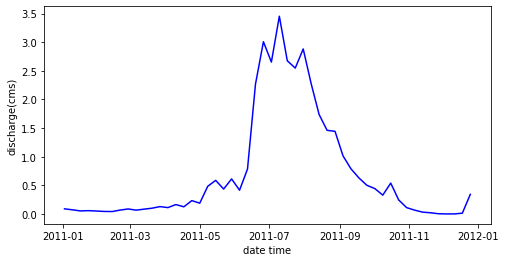

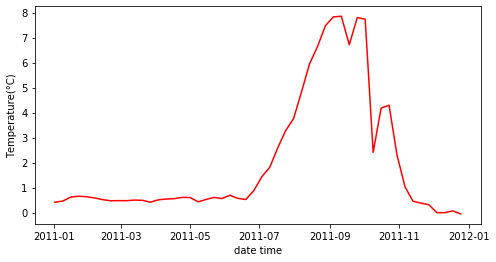

In [20]:
plt.figure(figsize=(8,4))
plt.plot(df_2011['datetime'], df_2011['discharge'], color='blue')
plt.xlabel('date time')
plt.ylabel('discharge(cms)')

plt.figure(figsize=(8,4))
plt.plot(df_2011['datetime'], df_2011['tmean'], color='red')
plt.xlabel('date time')
plt.ylabel('Temperature(°C)')

127.98871185687845
132.26737298906926


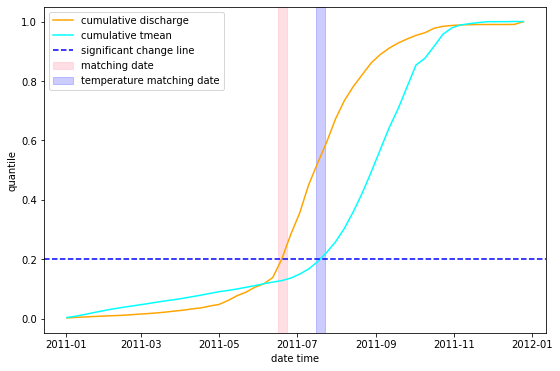

In [21]:
dsum2011=np.sum(df_2011['discharge'])
dcsum2011=np.cumsum(df_2011['discharge'])
dcp2011=dcsum2011/dsum2011

tsum2011=np.sum(df_2011['tmean'])
tcsum2011=np.cumsum(df_2011['tmean'])
tcp2011=tcsum2011/tsum2011

f2011=interp1d(dcp2011, df_2011.index)
print(f2011(0.2))
ft2011=interp1d(tcp2011, df_2011.index)
print(ft2011(0.2))

plt.figure(figsize=(9,6))
plt.plot(df_2011['datetime'], dcp2011, label='cumulative discharge', color='orange')
plt.plot(df_2011['datetime'], tcp2011, label='cumulative tmean', color='cyan')
plt.axhline(0.2, color='blue', linestyle='--', label='significant change line')
plt.axvspan('2011-06-16','2011-06-23', alpha=0.5, color='pink', label='matching date')
plt.axvspan('2011-07-16','2011-07-23', alpha=0.2, color='blue', label='temperature matching date')
plt.xlabel('date time')
plt.ylabel('quantile')
plt.legend(loc="best")

discharge 6/20/2011, temperature 7/19/2011

## For 2012 data

In [22]:
df_2012=df_week1[156:209]
df_2012.head()

,datetime,discharge,tmean
156,2012-01-01,1.178918,-0.183988
157,2012-01-08,2.534798,-0.238095
158,2012-01-15,2.180302,-0.197589
159,2012-01-22,3.004287,-0.126000
160,2012-01-29,4.603985,0.149573


Text(0, 0.5, 'discharge(cms)')

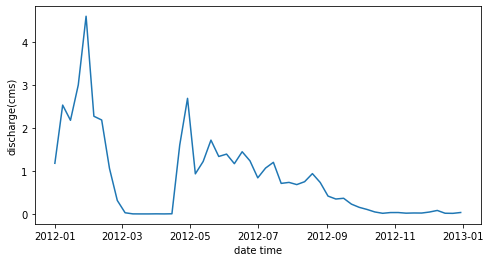

In [23]:
plt.figure(figsize=(8,4))
plt.plot(df_2012['datetime'], df_2012['discharge'])
plt.xlabel('date time')
plt.ylabel('discharge(cms)')

In [24]:
df_2012=df_2012[df_2012['datetime']>='2012-03-01']
df_2012.head()

,datetime,discharge,tmean
165,2012-03-04,0.026862,0.170893
166,2012-03-11,0.000932,0.180179
167,2012-03-18,0.000000,0.000000
168,2012-03-25,0.000000,0.000000
169,2012-04-01,0.001787,0.213571


Text(0, 0.5, 'Temperature(°C)')

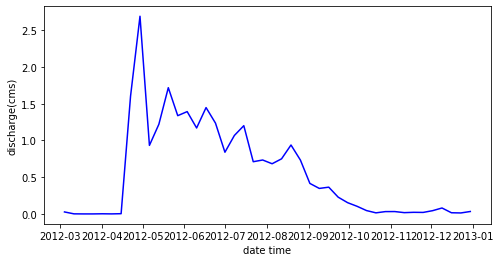

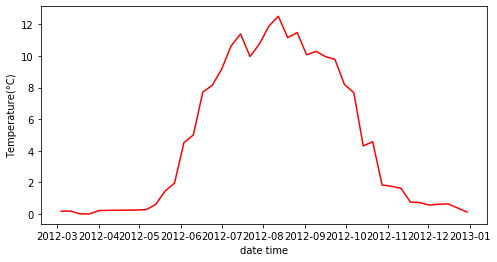

In [25]:
plt.figure(figsize=(8,4))
plt.plot(df_2012['datetime'], df_2012['discharge'], color='blue')
plt.xlabel('date time')
plt.ylabel('discharge(cms)')

plt.figure(figsize=(8,4))
plt.plot(df_2012['datetime'], df_2012['tmean'], color='red')
plt.xlabel('date time')
plt.ylabel('Temperature(°C)')

173.5964932641026
182.04479563646402


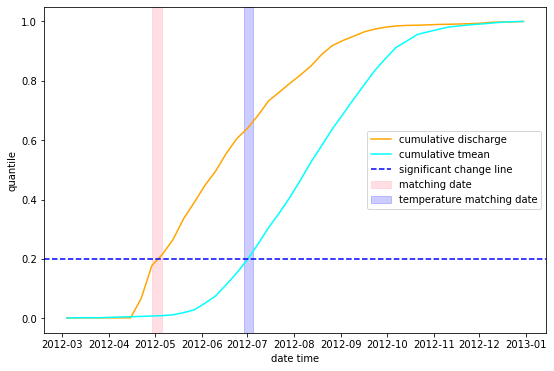

In [26]:
dsum2012=np.sum(df_2012['discharge'])
dcsum2012=np.cumsum(df_2012['discharge'])
dcp2012=dcsum2012/dsum2012

tsum2012=np.sum(df_2012['tmean'])
tcsum2012=np.cumsum(df_2012['tmean'])
tcp2012=tcsum2012/tsum2012

f2012=interp1d(dcp2012, df_2012.index)
print(f2012(0.2))
ft2012=interp1d(tcp2012, df_2012.index)
print(ft2012(0.2))

plt.figure(figsize=(9,6))
plt.plot(df_2012['datetime'], dcp2012, label='cumulative discharge', color='orange')
plt.plot(df_2012['datetime'], tcp2012, label='cumulative tmean', color='cyan')
plt.axhline(0.2, color='blue', linestyle='--', label='significant change line')
plt.axvspan('2012-04-29','2012-05-06', alpha=0.5, color='pink', label='matching date')
plt.axvspan('2012-06-29','2012-07-05', alpha=0.2, color='blue', label='temperature matching date')
plt.xlabel('date time')
plt.ylabel('quantile')
plt.legend(loc="best")

discharge 5/2/2012, temperature 7/2/2012

## For 2013 data

In [27]:
df_2013=df_week1[209:261]
df_2013.head()

,datetime,discharge,tmean
209,2013-01-06,0.008060,0.233601
210,2013-01-13,0.001295,0.401369
211,2013-01-20,0.000586,0.578214
212,2013-01-27,0.000000,0.000000
213,2013-02-03,0.000000,0.000000


Text(0, 0.5, 'Temperature(°C)')

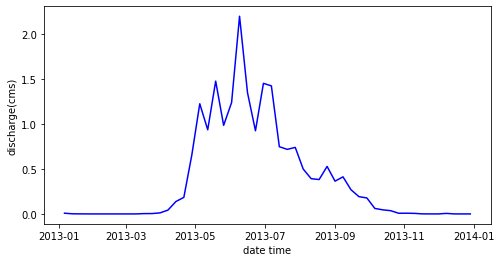

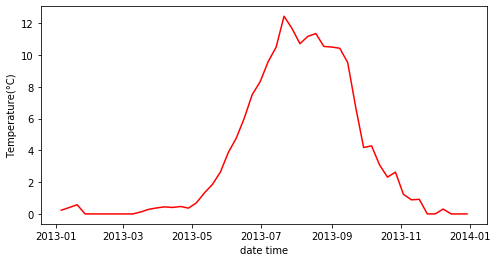

In [28]:
plt.figure(figsize=(8,4))
plt.plot(df_2013['datetime'], df_2013['discharge'], color='blue')
plt.xlabel('date time')
plt.ylabel('discharge(cms)')

plt.figure(figsize=(8,4))
plt.plot(df_2013['datetime'], df_2013['tmean'], color='red')
plt.xlabel('date time')
plt.ylabel('Temperature(°C)')

227.51520771434897
233.571512622485


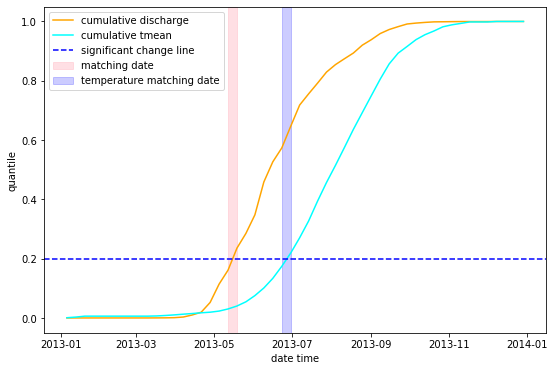

In [29]:
dsum2013=np.sum(df_2013['discharge'])
dcsum2013=np.cumsum(df_2013['discharge'])
dcp2013=dcsum2013/dsum2013

tsum2013=np.sum(df_2013['tmean'])
tcsum2013=np.cumsum(df_2013['tmean'])
tcp2013=tcsum2013/tsum2013

f2013=interp1d(dcp2013, df_2013.index)
print(f2013(0.2))
ft2013=interp1d(tcp2013, df_2013.index)
print(ft2013(0.2))

plt.figure(figsize=(9,6))
plt.plot(df_2013['datetime'], dcp2013, label='cumulative discharge', color='orange')
plt.plot(df_2013['datetime'], tcp2013, label='cumulative tmean', color='cyan')
plt.axhline(0.2, color='blue', linestyle='--', label='significant change line')
plt.axvspan('2013-05-12','2013-05-19', alpha=0.5, color='pink', label='matching date')
plt.axvspan('2013-06-23','2013-06-30', alpha=0.2, color='blue', label='temperature matching date')
plt.xlabel('date time')
plt.ylabel('quantile')
plt.legend(loc="best")

discharge 5/15/2013, temperature 6/26/2013

## For 2014 data

In [30]:
df_2014=df_week1[261:313]
df_2014.head()

,datetime,discharge,tmean
261,2014-01-05,0.0,0.0
262,2014-01-12,0.0,0.0
263,2014-01-19,0.0,0.0
264,2014-01-26,0.0,0.0
265,2014-02-02,0.0,0.0


Text(0, 0.5, 'Temperature(°C)')

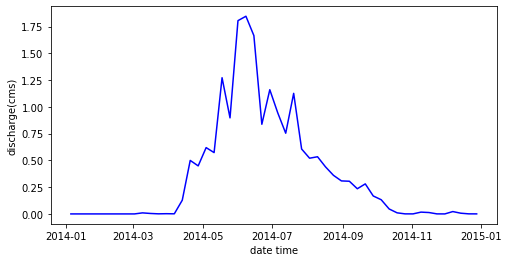

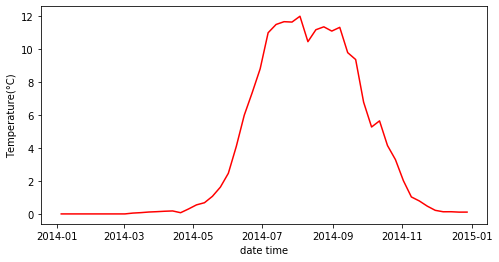

In [31]:
plt.figure(figsize=(8,4))
plt.plot(df_2014['datetime'], df_2014['discharge'], color='blue')
plt.xlabel('date time')
plt.ylabel('discharge(cms)')

plt.figure(figsize=(8,4))
plt.plot(df_2014['datetime'], df_2014['tmean'], color='red')
plt.xlabel('date time')
plt.ylabel('Temperature(°C)')

280.1803503908612
286.5011101456308


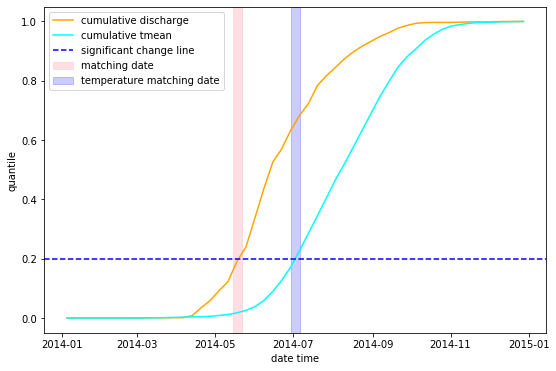

In [32]:
dsum2014=np.sum(df_2014['discharge'])
dcsum2014=np.cumsum(df_2014['discharge'])
dcp2014=dcsum2014/dsum2014

tsum2014=np.sum(df_2014['tmean'])
tcsum2014=np.cumsum(df_2014['tmean'])
tcp2014=tcsum2014/tsum2014

f2014=interp1d(dcp2014, df_2014.index)
print(f2014(0.2))
ft2014=interp1d(tcp2014, df_2014.index)
print(ft2014(0.2))

plt.figure(figsize=(9,6))
plt.plot(df_2014['datetime'], dcp2014, label='cumulative discharge', color='orange')
plt.plot(df_2014['datetime'], tcp2014, label='cumulative tmean', color='cyan')
plt.axhline(0.2, color='blue', linestyle='--', label='significant change line')
plt.axvspan('2014-05-15','2014-05-22', alpha=0.5, color='pink', label='matching date')
plt.axvspan('2014-06-29','2014-07-06', alpha=0.2, color='blue', label='temperature matching date')
plt.xlabel('date time')
plt.ylabel('quantile')
plt.legend(loc="best")

discharge 5/20/2014, temperature 6/2/2014

# ANOVA

## discharge

In [33]:
df_discharge_anova=pd.read_excel('df_danova.xlsx')
df_discharge_anova.head()

,index,years,discharge
0,0,2009,0.001777
1,1,2009,0.000694
2,2,2009,0.000077
3,3,2009,0.000809
4,4,2009,0.000770


In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('discharge ~ C(years)', data=df_discharge_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(years),5.0,8.681238,1.736248,2.815443,0.01672
Residual,307.0,189.322978,0.616687,NaN,NaN


In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog=df_discharge_anova['discharge'], groups=df_discharge_anova['years'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  2009   2010  -0.0117    0.9 -0.4533    0.43  False
  2009   2011     0.17 0.8707 -0.2717  0.6117  False
  2009   2012   0.2932  0.398 -0.1464  0.7327  False
  2009   2013  -0.1506    0.9 -0.5923  0.2911  False
  2009   2014  -0.1747 0.8531 -0.6164  0.2669  False
  2010   2011   0.1816 0.8272   -0.26  0.6233  False
  2010   2012   0.3048 0.3516 -0.1348  0.7444  False
  2010   2013  -0.1389    0.9 -0.5806  0.3027  False
  2010   2014  -0.1631 0.8966 -0.6047  0.2786  False
  2011   2012   0.1232    0.9 -0.3164  0.5628  False
  2011   2013  -0.3206 0.2997 -0.7623  0.1211  False
  2011   2014  -0.3447 0.2234 -0.7864   0.097  False
  2012   2013  -0.4438 0.0464 -0.8833 -0.0042   True
  2012   2014  -0.4679 0.0295 -0.9075 -0.0283   True
  2013   2014  -0.0241    0.9 -0.4658  0.4176  False
----------------------------------------------

There is a significance difference of discharge before and after 2012. 

## Temperature

In [36]:
df_tmean_anova=pd.read_excel('df_tanova.xlsx')
df_tmean_anova.head()

,index,years,tmean
0,0,2009,0.259740
1,1,2009,0.333839
2,2,2009,0.381458
3,3,2009,0.406696
4,4,2009,0.411607


In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('tmean ~ C(years)', data=df_tmean_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(years),5.0,134.031818,26.806364,1.722216,0.129165
Residual,307.0,4778.467539,15.565041,NaN,NaN


In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog=df_tmean_anova['tmean'], groups=df_tmean_anova['years'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  2009   2010  -0.3627    0.9 -2.5816 1.8562  False
  2009   2011  -0.9882 0.7711 -3.2071 1.2307  False
  2009   2012   0.8318 0.8843 -1.3766 3.0402  False
  2009   2013   0.5513    0.9 -1.6676 2.7702  False
  2009   2014    0.753    0.9 -1.4659 2.9719  False
  2010   2011  -0.6255    0.9 -2.8444 1.5934  False
  2010   2012   1.1945 0.6136 -1.0139 3.4029  False
  2010   2013    0.914 0.8262 -1.3049 3.1329  False
  2010   2014   1.1157 0.6763 -1.1032 3.3346  False
  2011   2012     1.82 0.1728 -0.3884 4.0284  False
  2011   2013   1.5395  0.351 -0.6794 3.7584  False
  2011   2014   1.7412 0.2181 -0.4777 3.9601  False
  2012   2013  -0.2805    0.9 -2.4889 1.9279  False
  2012   2014  -0.0788    0.9 -2.2872 2.1296  False
  2013   2014   0.2017    0.9 -2.0172 2.4206  False
---------------------------------------------------


There is no significant difference of water temperature from 2009-2014.